<h1><center>HEART DISEASE PREDICTION</center></h1>

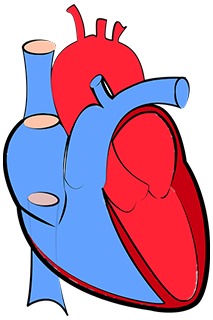

## EXECUTIVE SUMMARY
The aim of this project is to predict if a person has heart disease using classification models. 

The dataset was downloaded from [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction) where it was loaded into a Pandas DataFrame and cleaned. The process of data wrangling was not applied to the data since it was already in a presentable format.

Exploratory Data Analysis (EDA) was performed to discover insights about the data. Some visualizations were generated from the data and the relationship between different characteristics were compared.

Insights discovered from the data were:
* There are more males than females with heart disease.
* The relationship between age and heart disease cannot be distinguished. 
* The most common type of chest pain for people with heart disease is "ASY".
* The relationship between cholesterol level and maximum heart rate cannot be distinguished.

For the predictive analysis, the classification models selected were: Logistic Regression, Decision Tree and K-Nearest Neighbor (KNN). 

The features (X) selected were: 
* Age
* Sex
* ChestPainType
* RestingBP
* Cholesterol
* FastingBS
* RestingECG
* MaxHR
* ExerciseAngina
* Oldpeak
* ST_Slope.

Since these models cannot work with categorical values, the categorical features were converted to numerical values using the "One Hot Encoding" technique. An auxillary class was created to represent the models. An instance of the auxillary class was then created with the features (X) and target (y), where the data was standardized and split into training and testings sets. The classification models were created and passed into GridSearchCV objects to determine the best hyperparameters for each model. The accuracies of the models were calculated, where it was determined that the KNN model was the most accurate, having an accuracy of 85.33%. Additional features may be required to improve the accuracy of the models.

## TABLE OF CONTENTS
* [INTRODUCTION](#introduction)
* [METHODOLOGY](#methodology)
    * [INSTALLING AND IMPORTING LIBRARIES](#installing_importing_libraries)
    * [DATA COLLECTION](#data_collection)
    * [DATA CLEANING](#data_cleaning)
    * [DATA WRANGLING](#data_wrangling)
    * [EXPLORATORY  DATA  ANALYSIS](#exploratory_data_analysis)
    * [PREDICTIVE  ANALYSIS](#predicitve_analysis)
* [CONCLUSION](#conclusion)

## INTRODUCTION <a class="anchor" id="introduction"></a>
Heart Disease describes a range of conditions which affects the heart. It is usually associated with an accumulation of fatty deposits inside the arteries (artherosclerosis) and an increased risk of blood clots. The most common type of heart disease is Coronary Artery Disease (CAD) which occurs when the flow of oxygen-rich blood to the heart is blocked or reduced. This increases the strain on the heart which can eventually lead to angina (chest pain caused by restricted blood flow to the heart), heart attacks (where the blood flow to the heart is suddenly blocked) and heart failure (where the heart is unable to pump blood around the body properly).

**Problem Statement: To predict if a person has heart disease using different classification models.**

## METHODOLOGY <a class="anchor" id="methodology"></a>
1. The required libraries were installed and imported.
2. The dataset was downloaded from [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction) and loaded into a Pandas DataFrame.
3. The data was cleaned by:
   * Replacing cells that only contain whitespace characters with "np.nan" values.
   * Dropping any rows with "np.nan" values.
   * Removing duplicate rows (if any).
4. Data Wrangling was not applied to the data since it was already in a presentable format.
5. Exploratory Data Analysis (EDA) was performed to discover insights about the data.
6. Predictive Analysis was performed on the data using different classification models to determine which model is the most accurate.

### INSTALLING AND IMPORTING LIBRARIES <a class="anchor" id="installing_importing_libraries"></a>

**The relavent libraries are installed.**

The command to install packages/libraries are: **!pip install {library}** The following libraries are installed: NumPy, SciPy, Pandas, Matplotlib, Seaborn and Scikit-Learn.

In [1]:
!pip install numpy
!pip install scipy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

**The required libraries are imported.**

For this project, the only libraries that are required are: NumPy, Pandas, Matplotlib, Seaborn and Scikit-Learn.

In [2]:
import numpy as np # Library for utlizing high perfornmance arrays.
import pandas as pd # Library for data cleaning, manipulation and analysis.
import matplotlib.pyplot as plt # Library for data visualization.
import seaborn as sns # Library for data visualization.

from sklearn.preprocessing import StandardScaler # For data standardization.
from sklearn.model_selection import train_test_split # For splitting the data into training and testing sets.
from sklearn.model_selection import GridSearchCV # For determining the best hyperparameters of classification models.

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### DATA COLLECTION <a class="anchor" id="data_collection"></a>

The dataset was downloaded from [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction).
Since the dataset is a CSV (Comma Separated Value) file, it is loaded into a Pandas DataFrame using the read_csv() function.

In [3]:
filename = 'data/heart_disease_data.csv' # File Path.
df = pd.read_csv(filename) # Loads the dataset into a Pandas DataFrame.
df.head() # Displays the first 5 rows of the dataframe.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Displays information about the DataFrame such as column names, the number of non-null values in each column and the dataype of the columns.
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe() # Displays statistical information about the numerical columns in the DataFrame. 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### DATA CLEANING <a class="anchor" id="data_cleaning"></a>

Before analyzing, visualizing and modeling the data, the data needs to be cleaned. The process of data cleaning involves three steps:
1. Handling missing values in rows or columns (either by removing or replacing them).
2. Removing duplicate rows.
3. Dealing with data in the wrong format (such as an incorrect date format).

In [6]:
df.replace(r'^\s*$', np.nan, inplace=True) # Replaces any values that only contain whitespace characters with "np.nan" values.
df.dropna(inplace=True) # Deletes any rows with np.nan values.
df.drop_duplicates(inplace=True) # Removes duplicate rows (if any).

### DATA WRANGLING <a class="anchor" id="data_wrangling"></a>
Data wrangling is the process of organizing, restructuring and transforming the data into a desired format for analysis. Since the data is already in a presentable format, the process of data wrangling was not applied.

### EXPLORATORY DATA ANALYSIS <a class="anchor" id="exploratory_data_analysis"></a>

**What are the age range of the participants?**

In [7]:
minimum_age = df['Age'].min() # Obtains the minimum value of the "Age" column in the DataFrame.
maximum_age = df['Age'].max() # Obtains the maximum value of the "Age" column in the DataFrame.
print(f'The age of the participants ranges from {minimum_age}-{maximum_age} years.') # Displays the age range of the participants.

The age of the participants ranges from 28-77 years.


**What are the number of participants with heart disease?**

In [8]:
participants = len(df) # Obtains the number of raws in the DataFrame.
print(f'There are {participants} participants in this dataset.') # Displays the number of participants in the dataset.

There are 918 participants in this dataset.


In [9]:
df['HeartDisease'].value_counts() # Display the number of participants with heart disease.

1    508
0    410
Name: HeartDisease, dtype: int64

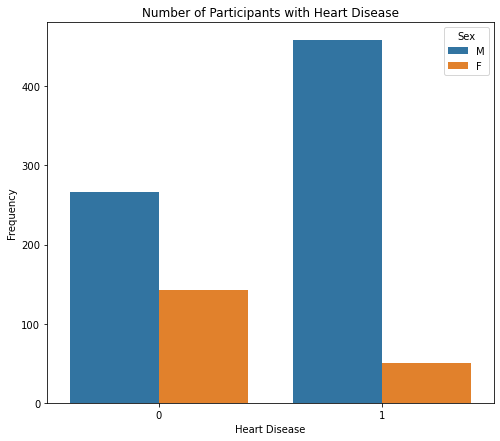

In [10]:
fig, ax = plt.subplots(figsize=(8, 7)) # Sets the size of the plot.
sns.countplot(x='HeartDisease', hue='Sex', data=df) # Generates a Frequency plot of the participants with Heart Disease.
plt.xlabel('Heart Disease') # x-axis label.
plt.ylabel('Frequency') # y-axis label.
plt.title('Number of Participants with Heart Disease') # Title of plot.
plt.show() # Displays the plot.

Out of the all the participants, 508 of them have heart disease. For the participants with heart disease, over 450 of them are male and about 50 of them are female.

**Based on the age range, how many participants have heart disease.**

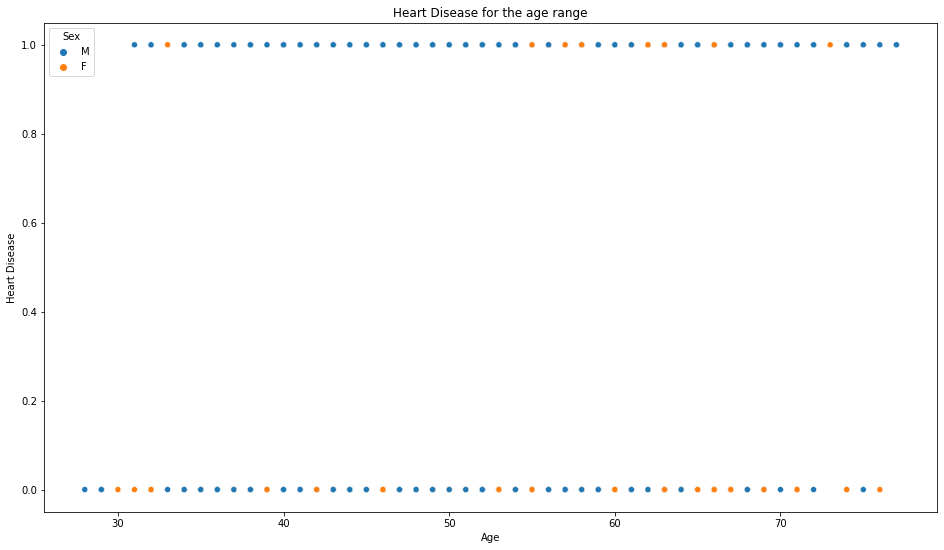

In [11]:
fig, ax = plt.subplots(figsize=(16, 9)) # Sets the size of the plot.
sns.scatterplot(data=df, x='Age', y='HeartDisease', hue='Sex') # Generates a scatter plot of "HeartDisease" Vs. "Age".
plt.xlabel('Age') # x-axis label.
plt.ylabel('Heart Disease') # y-axis label.
plt.title('Heart Disease for the age range') # Title of plot.
plt.show() # Display the plot.

For the age range (i.e. 28-77 years), it can be observed that there are more males than females with heart disease. The relationship between age and heart disease cannot be distinguished.

**What are the types of Chest Pain experienced by the participants?**

In [12]:
df['ChestPainType'].value_counts() # Displays the different types of chest pains and their frequency.

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

There are 4 types of chest pain: "ASY", "NAP", "ATA" and "TA".
The most common chest pain type is "ASY", wheares the least common is "TA".

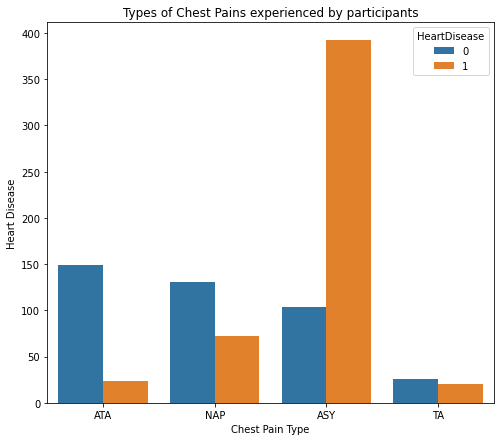

In [13]:
fig, ax = plt.subplots(figsize=(8, 7)) # Sets the size of the plot.
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)  # Generates a Frequency plot of the Chest Pain Type.
plt.xlabel('Chest Pain Type') # x-axis label.
plt.ylabel('Heart Disease') # y-axis label.
plt.title('Types of Chest Pains experienced by participants') # Title of plot.
plt.show() # Display the plot.

Out of all the participants, it is observed that the most common type of chest pain for people with heart disease is "ASY".

**Is there a relationship between Cholestorol level and Maximum Heart Rate?**

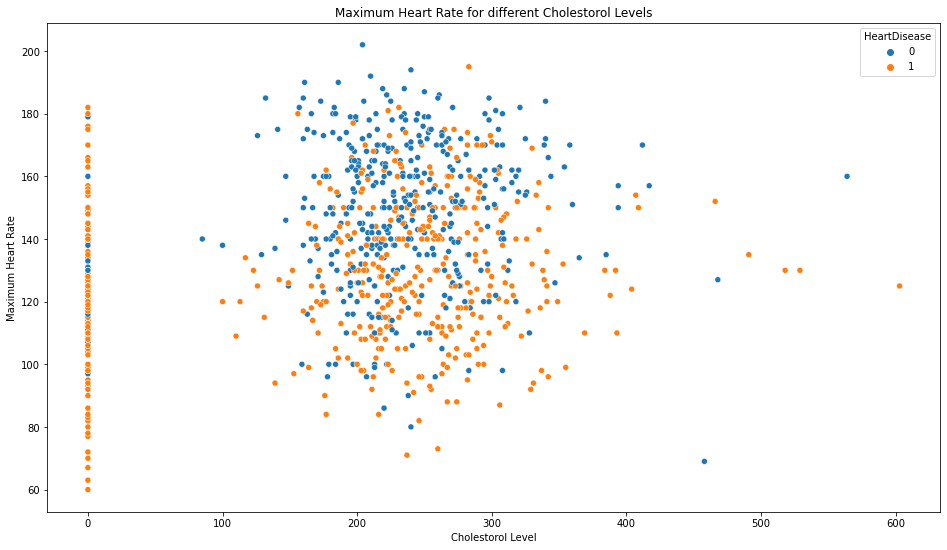

In [14]:
fig, ax = plt.subplots(figsize=(16, 9)) # Sets the size of the plot.
sns.scatterplot(x='Cholesterol', y='MaxHR', hue='HeartDisease', data=df) # Generates a scatter plot of Maximum Heart Rate vs. Cholestorol Level for people with Heart Disease.
plt.xlabel('Cholestorol Level') # x-axis title.
plt.ylabel('Maximum Heart Rate') # y-axis title.
plt.title('Maximum Heart Rate for different Cholestorol Levels') # Title of plot.
plt.show() # Display the plot.

There seems to be an anomaly for a cholestorol level of 0, since it is very unlikely that a person will not have a cholestorol level of 0. This may be due to an incorrect recording of the cholestorol level, or a placeholder value of 0 was recorded if the cholestorol level was not obtained. For a Cholestorol level range of 100-600, the relationship of the Maximum Heart Rate and the Cholestorol level cannot be distinguished for people with Heart Disease since there seems to be a random distribution of the data points.

### PREDICTIVE ANALYSIS <a class="anchor" id="predicitve_analysis"></a>

**The features (X) and target (y) was selected from the dataset.**

Before performing predictive analysis on the data, the features (predictor variables) and the target needs to be selected from the dataset. The features (X) are be used to predict the target (y). Since classification models only work with numerical values, categorical columns (columns containing non numerical values) will need to be converted into numerical columns using the "One Hot Encoding" technique. 

In [15]:
# Extracts relevant columns from the DataFrame, which is to be used as the features.
features = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

# Converts categorical columns into numerical columns using the "One Hot Encoding" technique, and store the resulting DataFrame in X.
X = pd.get_dummies(features, prefix=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

y = df['HeartDisease'] # Extracts the "HeartDisease" column from the DataFrame, which is to be used as the target.

**An auxillary class was created.**

This class represents 3 classification models for predictive analysis:
1. Logistic Regression
2. Decision Tree
3. K-Nearest Neighbors (KNN)

GridSearchCV was used for determining the best hyperparameters and accuracy for the classification models.

In [16]:
class ClassificationModels:
    '''Class representing different classification models.'''
    def __init__(self, X, y):
        '''Initializes the features (X) and the target (y), as well as other attributes.'''
        self.X = X # Features (or predictor variables)
        self.y = y # Target
        
        self.accuracies = {} # Dictionary to store the accuracy of the models.
        self.best_hyperparameters = {} # Dictionary to store the best hyperparameters for the models.
        
    def standardize_data(self):
        '''Standardizes the features by removing the mean and scaling to unit variance.'''
        scaler = StandardScaler() # Creates a StandardScaler object for data standardization.
        self.X = scaler.fit_transform(self.X) # Fits the features to the StandardScaler object, and returns the scaled data.
    
    def split_data(self):
        '''Splits the data into training and testing sets.'''
        # Split the data into training and testing sets with a test size of 20%, and a random state of 2.
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=2)
        
    def logistic_regression_model(self):
        '''Creates and fit a Logistic Regression model using GridSearchCV.'''
        # Logisitic Regression parameters for determining best hyperparameters.
        parameters = {'C': [0.01,0.1,1], 'penalty': ['l2'], 'solver': ['lbfgs'], 'max_iter': [10000]}
        
        logistic_regression_model = LogisticRegression() # Creates a Logistic Regression model.

        # Creates a GridSearchCV object with the Logistic Regression model and its parameters, with 10 cross validations.
        self.logistic_regression_cv = GridSearchCV(logistic_regression_model, parameters, scoring='accuracy', cv=10) 
        self.logistic_regression_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.

        # Calculates the accuracy of the model using the testing data, and store it in the "accuracies" dictionary.
        self.accuracies['Logistic Regression'] = self.logistic_regression_cv.score(self.X_test, self.y_test) 
        # Stores the best hyperparemters of the model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['Logistic Regression'] = self.logistic_regression_cv.best_params_
       
    def decision_tree_model(self):
        '''Creates and fit a Decision Tree model using GridSearchCV.'''
        # Decision Tree parameters for determining best hyperparemeters.
        parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2*n for n in range(1,10)],
                      'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}
        
        decision_tree_model = DecisionTreeClassifier() # Creates a Decision Tree model.
        
        # Creates a GridSearchCV object with the Decision Tree model and its parameters, with 10 cross validations.
        self.decision_tree_cv = GridSearchCV(decision_tree_model, parameters, scoring='accuracy', cv=10)
        self.decision_tree_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        # Calculates the accuracy of the model using the testing data, and store it in the "accuracies" dictionary.
        self.accuracies['Decision Tree'] = self.decision_tree_cv.score(self.X_test, self.y_test)
        # Stores the best hyperparameters of the model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['Decision Tree'] = self.decision_tree_cv.best_params_
    
    def knn_model(self):
        '''Creates and fits a K-Nearest Neighbors (KNN) model using GridSearchCV.'''
        # KNN Parameters for determining best hyperparameters.
        parameters = {'n_neighbors': list(range(1, 11)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1,2]}
        
        knn_model = KNeighborsClassifier() # Creates a KNN model.
        # Creates a GridSearchCV object with the KNN model and its parameters, with 10 cross validations.
        self.knn_cv = GridSearchCV(knn_model, parameters, scoring='accuracy', cv=10)
        self.knn_cv.fit(self.X_train, self.y_train) # Fits the GridSearchCV object using the training data.
        
        # Calculates the accuracies of the model using the testing data, and store it in the "accuracies" dictionary.
        self.accuracies['KNN'] = self.knn_cv.score(self.X_test, self.y_test)
        # Stores the best hyperparameters of the KNN model in the "best_hyperparameters" dictionary.
        self.best_hyperparameters['KNN'] = self.knn_cv.best_params_

**An instance of the "ClassificationModels" class  was created, the features were standardized and the dataset was split into training and testing data.**

In [17]:
models = ClassificationModels(X, y) # Creates a "ClassificationModels" object and pass it the features (X) and the target (Y).
models.standardize_data() # Standardizes the data using the StandardScaler object.
models.split_data() # Splits the dataset into training and testing sets.

**The classification models were created.**

In [18]:
models.logistic_regression_model() # Creates and fit a Logistic Regression model into a GridSearchCV object.
models.decision_tree_model() # Creates and fit a Decision Tree model into a GridSearchCV object.
models.knn_model() # Creates and fit a KNN Tree model into a GridSearchCV object.

**The accuracies of the models were displayed.**

In [19]:
model_accuracies = models.accuracies # Retrieves the "accuracies" dictionary attribute from the "models" object.

# Iterate over the "model_accuracies" dictionary and displays the model with its corresponding accuracy.
for model, accuracy in model_accuracies.items():
    percentage_accuracy = accuracy * 100 # Calculate the accuracy as a percentage.
    print(f'{model} Accuracy: {percentage_accuracy:.2f}%') # Display the model with its corresponding accuracy.
    
# Obtains the model with the highest accuracy from the 'model_accuracies' dictionary.
most_accurate_model = max(model_accuracies, key=model_accuracies.get)
print(f'\nMost accurate model: {most_accurate_model}') # Displays the most accurate model.

Logistic Regression Accuracy: 84.24%
Decision Tree Accuracy: 78.80%
KNN Accuracy: 85.33%

Most accurate model: KNN


**A bar graph of the model accuracies was generated.**

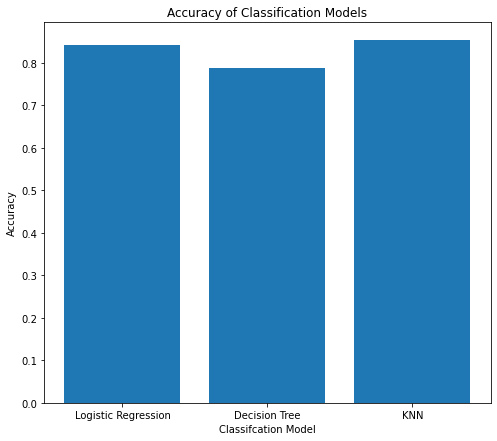

In [20]:
models = model_accuracies.keys() # Model names.
accuracies = model_accuracies.values() # Model accuracies.

fig, ax = plt.subplots(figsize=(8, 7)) # Sets the size of the plot.
plt.bar(x=models, height=accuracies) # Generate a bar chart of the model accuracies.
plt.title('Accuracy of Classification Models') # Title of plot.
plt.xlabel('Classifcation Model') # x-axis label.
plt.ylabel('Accuracy') # y-axis label.
plt.show() # Display the plot.

It can be observed that the KNN model is the most accurate with an accuracy of 85.33%.

## CONCLUSION <a class="anchor" id="conclusion">
* Insights discovered from the data were:
  * There are more males than females with heart disease.
  * The relationship between age and heart disease cannot be distinguished. 
  * The most common type of chest pain for people with heart disease is "ASY".
  * The relationship between cholesterol level and maximum heart rate cannot be distinguished.
    
* The features that were selected for predictive analysis were: 
    * Age
    * Sex
    * ChestPainType
    * RestingBP
    * Cholesterol
    * FastingBS
    * RestingECG
    * MaxHR
    * ExerciseAngina
    * Oldpeak
    * ST_Slope
* The classification models that were used were: Logistic Regression, Decision Tree and K-Nearest Neighbors (KNN).
* Out of the three models, the KNN model is the most accurate, having an accuracy of 85.33%
* Additional features may be required to improve the accuracy of the models.